### Importando bibliotecas

In [1]:
import xarray as xr #manipulação de múltiplos arrays
import matplotlib.pyplot as plt #plotagem gráfica
import pandas as pd #manipulação de conjunto de dados e estatística
import numpy as np #manipulação numérica de dados
import seaborn as sns #plotagem de gráficos estatísticos

### Importando o conjunto de dados

#### O conjunto de dados foi importado site do National Oceanic and Atmospheric Administration's (NOAA)

Links: https://www.ndbc.noaa.gov/

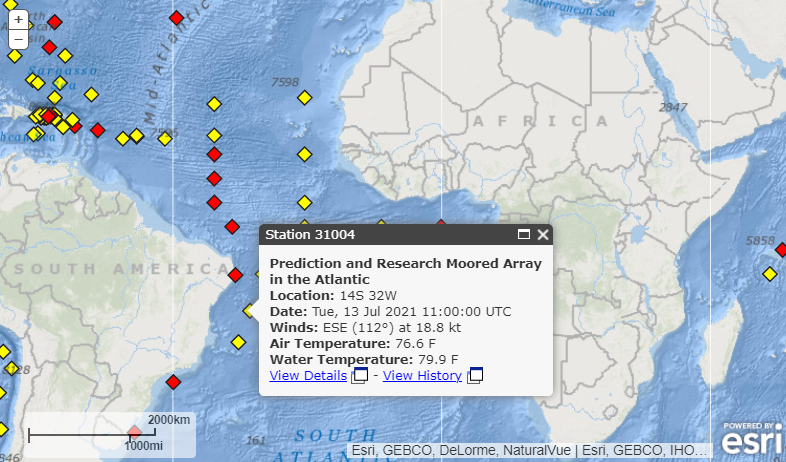

In [ ]:
# Dados da Estação em águas soteropolitanas
# data2 = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/31004/31004h9999.nc')
# data2

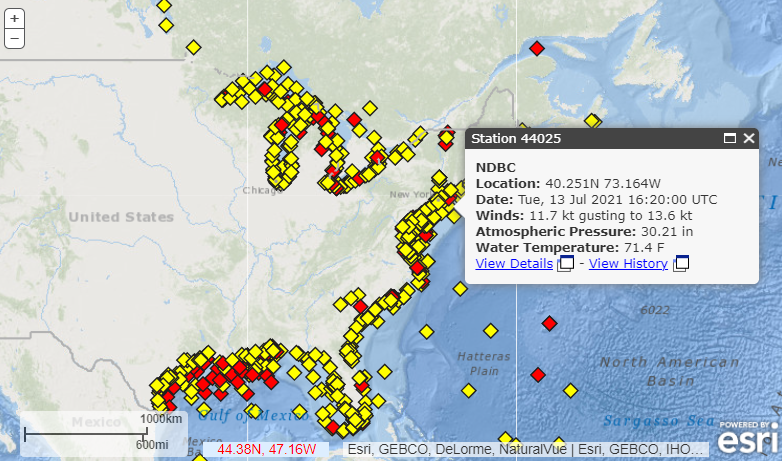

In [2]:
data = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')
data

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 283817)
Coordinates:
  * latitude                 (latitude) float32 40.25
  * longitude                (longitude) float32 -73.16
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 20...
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

**Limitando o período de amostragem**

In [3]:
data = data.sel(time=slice('2019-01-01','2020-01-01'))

**Transformando o conjunto de dados num formato agradável**

In [4]:
df = data.to_dataframe()
df.head()

wind_dir  wind_spd  gust  \
latitude  longitude  time                                            
40.250999 -73.164001 2019-01-01 00:50:00     135.0      11.3  14.1   
                     2019-01-01 01:50:00     127.0      11.2  14.0   
                     2019-01-01 02:50:00     137.0      12.7  15.3   
                     2019-01-01 03:50:00     150.0      13.7  16.9   
                     2019-01-01 04:50:00     168.0       9.5  11.2   

                                          wave_height  \
latitude  longitude  time                               
40.250999 -73.164001 2019-01-01 00:50:00         1.56   
                     2019-01-01 01:50:00         1.92   
                     2019-01-01 02:50:00         2.23   
                     2019-01-01 03:50:00         2.52   
                     2019-01-01 04:50:00         2.77   

                                                      dominant_wpd  \
latitude  longitude  time                                            
40.250999 -73.164001 2019-01-01 00:50:00 0 days 00:00:05.559999943   
                     2019-01-01 01:50:00 0 days 00:00:05.880000114   
                     2019-01-01 02:50:00    0 days 00:00:06.250000   
                     2019-01-01 03:50:00 0 days 00:00:06.670000076   
                     2019-01-01 04:50:00 0 days 00:00:07.139999866   

                                                       average_wpd  \
latitude  longitude  time                                            
40.250999 -73.164001 2019-01-01 00:50:00 0 days 00:00:04.710000038   
                     2019-01-01 01:50:00 0 days 00:00:05.090000153   
                     2019-01-01 02:50:00 0 days 00:00:05.219999790   
                     2019-01-01 03:50:00 0 days 00:00:05.489999771   
                     2019-01-01 04:50:00    0 days 00:00:05.750000   

                                          mean_wave_dir  air_pressure  \
latitude  longitude  time                                               
40.250999 -73.164001 2019-01-01 00:50:00          153.0   1018.400024   
                     2019-01-01 01:50:00          135.0   1016.599976   
                     2019-01-01 02:50:00          143.0   1013.599976   
                     2019-01-01 03:50:00          148.0   1010.700012   
                     2019-01-01 04:50:00          141.0   1010.000000   

                                          air_temperature  \
latitude  longitude  time                                   
40.250999 -73.164001 2019-01-01 00:50:00              8.1   
                     2019-01-01 01:50:00              8.3   
                     2019-01-01 02:50:00              8.7   
                     2019-01-01 03:50:00              9.5   
                     2019-01-01 04:50:00             10.2   

                                          sea_surface_temperature  \
latitude  longitude  time                                           
40.250999 -73.164001 2019-01-01 00:50:00                      7.1   
                     2019-01-01 01:50:00                      7.1   
                     2019-01-01 02:50:00                      7.2   
                     2019-01-01 03:50:00                      7.2   
                     2019-01-01 04:50:00                      7.2   

                                          dewpt_temperature  visibility  \
latitude  longitude  time                                                 
40.250999 -73.164001 2019-01-01 00:50:00                NaN         NaN   
                     2019-01-01 01:50:00                NaN         NaN   
                     2019-01-01 02:50:00                NaN         NaN   
                     2019-01-01 03:50:00                NaN         NaN   
                     2019-01-01 04:50:00                NaN         NaN   

                                          water_level  
latitude  longitude  time                              
40.250999 -73.164001 2019-01-01 00:50:00          NaN  
                     2019-01-01 01:50:00          N

**Transformando os indexes em colunas**

In [7]:
df.reset_index(inplace=True)

In [13]:
df.head()

,latitude,longitude,time,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
0,40.250999,-73.164001,2019-01-01 00:50:00,135.0,11.3,14.1,1.56,0 days 00:00:05.559999943,0 days 00:00:04.710000038,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN
1,40.250999,-73.164001,2019-01-01 01:50:00,127.0,11.2,14.0,1.92,0 days 00:00:05.880000114,0 days 00:00:05.090000153,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN
2,40.250999,-73.164001,2019-01-01 02:50:00,137.0,12.7,15.3,2.23,0 days 00:00:06.250000,0 days 00:00:05.219999790,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN
3,40.250999,-73.164001,2019-01-01 03:50:00,150.0,13.7,16.9,2.52,0 days 00:00:06.670000076,0 days 00:00:05.489999771,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN
4,40.250999,-73.164001,2019-01-01 04:50:00,168.0,9.5,11.2,2.77,0 days 00:00:07.139999866,0 days 00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN


In [14]:
df.time

0      2019-01-01 00:50:00
1      2019-01-01 01:50:00
2      2019-01-01 02:50:00
3      2019-01-01 03:50:00
4      2019-01-01 04:50:00
               ...        
8664   2019-12-31 18:50:00
8665   2019-12-31 19:50:00
8666   2019-12-31 20:50:00
8667   2019-12-31 21:50:00
8668   2019-12-31 22:50:00
Name: time, Length: 8669, dtype: datetime64[ns]

**Calculando o tempo corrido desde a primeira amostra**

In [15]:
df.time[0]

Timestamp('2019-01-01 00:50:00')

In [16]:
df.time[8668]

Timestamp('2019-12-31 22:50:00')

In [17]:
startTime = df.time[0]
endTime = df.time[8668]

ts_s = pd.Timestamp(startTime)
ts_e = pd.Timestamp(endTime)

**Dia Juliano**

In [20]:
ts_s

Timestamp('2019-01-01 00:50:00')

In [18]:
#0 Julian date is noon January 1, 4713 BC
elapsed = ts_e.to_julian_date() - ts_s.to_julian_date()
delta = pd.Timestamp(df.time[1]).to_julian_date() - pd.Timestamp(startTime).to_julian_date()

**Criando coluna para o tempo decorrido**

In [21]:
df['elapsed_time'] = np.arange(0, elapsed, delta)[:8669]

In [22]:
df.head()

,latitude,longitude,time,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level,elapsed_time
0,40.250999,-73.164001,2019-01-01 00:50:00,135.0,11.3,14.1,1.56,0 days 00:00:05.559999943,0 days 00:00:04.710000038,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN,0.000000
1,40.250999,-73.164001,2019-01-01 01:50:00,127.0,11.2,14.0,1.92,0 days 00:00:05.880000114,0 days 00:00:05.090000153,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN,0.041667
2,40.250999,-73.164001,2019-01-01 02:50:00,137.0,12.7,15.3,2.23,0 days 00:00:06.250000,0 days 00:00:05.219999790,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN,0.083333
3,40.250999,-73.164001,2019-01-01 03:50:00,150.0,13.7,16.9,2.52,0 days 00:00:06.670000076,0 days 00:00:05.489999771,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN,0.125000
4,40.250999,-73.164001,2019-01-01 04:50:00,168.0,9.5,11.2,2.77,0 days 00:00:07.139999866,0 days 00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN,0.166667


**Primeiro plot**

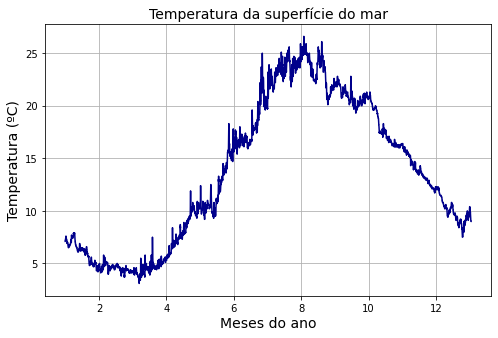

In [40]:
plt.figure(figsize=(8,5))
plt.plot(df.elapsed_time/30 + 1, df.sea_surface_temperature, c='darkblue')
plt.title('Temperatura da superfície do mar', fontsize=14)
plt.xlabel('Meses do ano', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.grid()

**Plotagem de duas séries temporais**

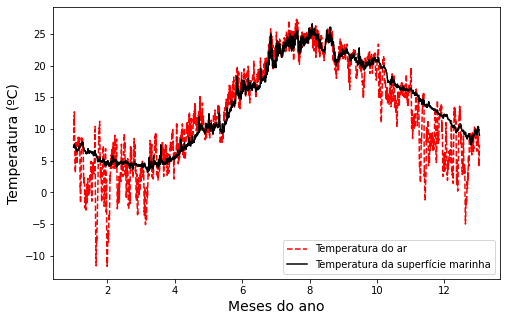

In [48]:
plt.figure(figsize=(8,5))
plt.plot(df.elapsed_time/30 + 1, df.air_temperature, c='red', label='Temperatura do ar', ls='--')
plt.plot(df.elapsed_time/30 + 1, df.sea_surface_temperature, c='black', label='Temperatura da superfície marinha')
#plt.title('Temperatura da superfície do mar', fontsize=14)
plt.xlabel('Meses do ano', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
#plt.xlim(datetime.date(2019,1,1),datetime.date(2020,1,1))
plt.legend()

In [49]:
import datetime

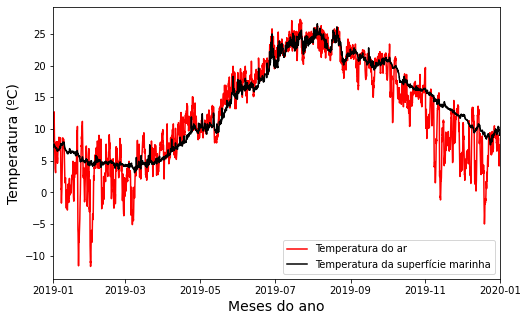

In [50]:
plt.figure(figsize=(8,5))
plt.plot(df.time, df.air_temperature, c='red', label='Temperatura do ar')
plt.plot(df.time, df.sea_surface_temperature, c='black', label='Temperatura da superfície marinha')
#plt.title('Temperatura da superfície do mar', fontsize=14)
plt.xlabel('Meses do ano', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.xlim(datetime.date(2019,1,1),datetime.date(2020,1,1))
plt.legend()

**Plotagem múltipla**

No handles with labels found to put in legend.


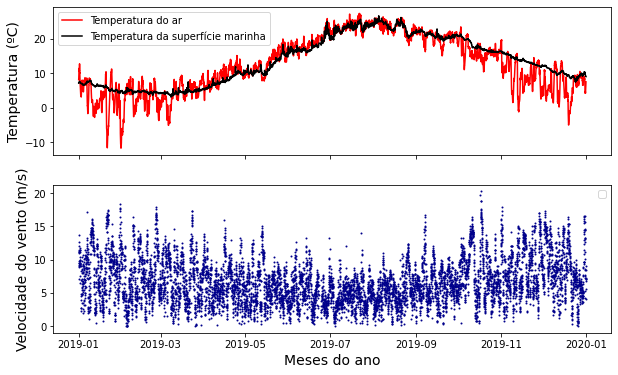

In [60]:
fig, axes = plt.subplots(nrows=2, figsize=(10,6))

axes[0].plot(df.time, df.air_temperature, c='red', label='Temperatura do ar')
axes[0].plot(df.time, df.sea_surface_temperature, c='black', label='Temperatura da superfície marinha')

axes[1].scatter(df.time, df.wind_spd, c='darkblue', s=1)

axes[0].set_xticklabels('')
axes[0].set_ylabel('Temperatura (ºC)', fontsize=14)

axes[1].set_ylabel('Velocidade do vento (m/s)', fontsize=14)
axes[1].set_xlabel('Meses do ano', fontsize=14)

for ax in axes:
    ax.legend()

**Crossplots**

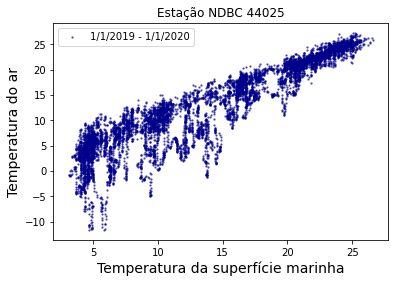

In [61]:
plt.scatter(df.sea_surface_temperature, df.air_temperature, s=2, c='darkblue', alpha=0.5, label='1/1/2019 - 1/1/2020')
plt.title('Estação NDBC 44025')
plt.xlabel('Temperatura da superfície marinha', fontsize=14)
plt.ylabel('Temperatura do ar', fontsize=14)
plt.legend()

**Histograma**

<AxesSubplot:>

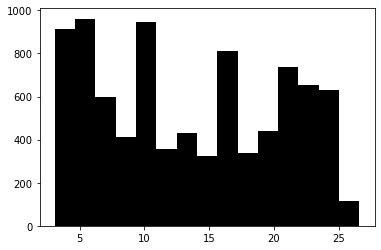

In [63]:
df.sea_surface_temperature.hist(bins=15, color='black', grid=False)

**Boxplot**

Text(0.5, 0, 'Temperatura da superfície marinha (ºC)')

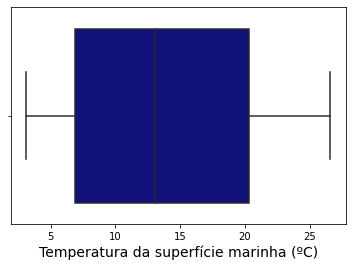

In [64]:
sns.boxplot(x=df['sea_surface_temperature'], color='darkblue')
plt.xlabel('Temperatura da superfície marinha (ºC)', fontsize=14)

In [65]:
colunas = df[['wind_spd','gust','wave_height','air_pressure','air_temperature','sea_surface_temperature']].columns
colunas

Index(['wind_spd', 'gust', 'wave_height', 'air_pressure', 'air_temperature',
       'sea_surface_temperature'],
      dtype='object')

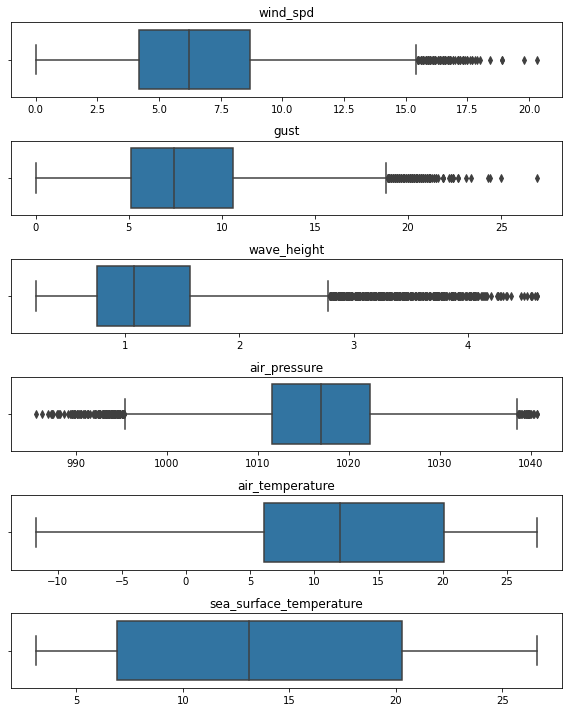

In [66]:
fig, axes = plt.subplots(ncols=1,nrows=len(colunas), figsize=(8,10))
for i,column in enumerate(colunas):
    sns.boxplot(ax=axes[i],x=df[f'{column}']) 
    axes[i].set_xlabel('')
    axes[i].set_title(column)
fig.tight_layout()

**Variáveis distintas num mesmo gráfico**

Text(0, 0.5, 'Pressão do ar')

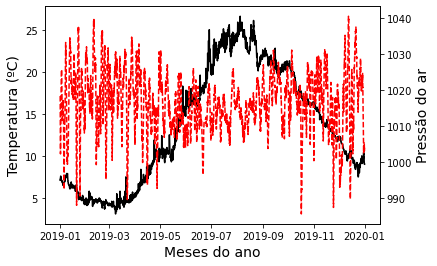

In [67]:
#mmHg? Pa? 
fig, ax = plt.subplots()
tw_ax = ax.twinx() # Create a second axes that shares the same x-axis

ax.plot(df.time, df.sea_surface_temperature, c='black')
ax.set_ylabel('Temperatura (ºC)', fontsize=14)
ax.set_xlabel('Meses do ano', fontsize=14)

tw_ax.plot(df.time, df.air_pressure, c='red', ls='--')
tw_ax.set_ylabel('Pressão do ar', fontsize=14)